In [2]:
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt

In [23]:
f = lambda x: ((1 - 0.25*x**2)/0.0625)**0.5

(-0.2, 0.2)

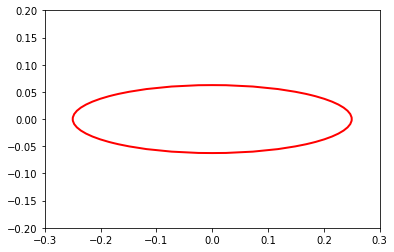

In [24]:
from matplotlib.patches import Ellipse
ax = plt.subplot()

ellipse = Ellipse(xy=(0, 0), width=0.5, height=0.125,edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
plt.xlim([-0.3,0.3])
plt.ylim([-0.2,0.2])

In [25]:
x1 = np.linspace(-0.25,0.25,1000)

In [29]:
y1 = f(x1)

In [30]:
y2 = -f(x1)

In [74]:
x = np.array([x1,x1]).reshape(2000)
y = np.array([y1,y2]).reshape(2000)

In [75]:
def function(x,y,a=1,b=1):
    return np.sum((a*x**2+b*y**2-1)**2)

def residual_function(x, y,a,b):
    return a*x**2+b*y**2-1

In [76]:
def R_Gradient(x, y):
    v = np.ones(2)
    v[0] = x**2
    v[1] = y**2   
    return v

def Jacobian_Matrix(x, y):
    v = np.array([ R_Gradient(x[0], y[0])])    
    for i in range(1,len(x)):
        v = np.vstack( (v, R_Gradient(x[i], y[i])) )
    return v

def Guassian_Approximation(x,y):
    m = Jacobian_Matrix(x,y)
    mt = np.transpose(m)
    return np.dot(mt,m)

def Gradient(x, y,a,b):
    m =Jacobian_Matrix(x,y)
    mt = np.transpose(m)
    r = residual_function(x, y,a,b)
    return np.dot(mt,r)

In [83]:
def backtracking_line_search(func, v, x,y , a,b ,  pk, t=1, alpha = 0.1, beta = 0.8):

    while((func(x,y,a+t*pk[0],b+t*pk[1])) > (func(x,y,a,b) + alpha*t*(v@pk))):
        t = t*beta
    return t

def newton_bt(fun, grad, hess, a,b, x0, y, to1 = 10**-5):
    x = x0
    history = np.array([a,b])
    v = grad(x, y,a,b)
    while(la.norm(v) > to1):
        v = grad(x ,y,a,b)
        p = la.solve(hess(x,y),-v)
        t1 = backtracking_line_search(fun, v, x, y,a,b ,p)
        a = a  + t1 * p[0]
        b = b  + t1 * p[1]
        history = np.vstack( (history, [a,b]) )
    return history,a,b

In [84]:
a = 1
b = 1

In [85]:
hist,astar,bstar = newton_bt(function, Gradient, Guassian_Approximation, a,b, x, y)

In [86]:
len(x)

2000

In [87]:
len(y)

2000

In [88]:
astar

0.25000000000000017

In [89]:
bstar

0.0625

(-0.2, 0.2)

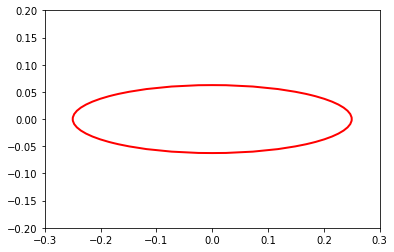

In [92]:
ax = plt.subplot()

ellipse = Ellipse(xy=(0, 0), width=2*astar, height=2*bstar,edgecolor='r', fc='None', lw=2)
ax.add_patch(ellipse)
plt.xlim([-0.3,0.3])
plt.ylim([-0.2,0.2])